In [4]:
#https://www.tensorflow.org/probability/examples/Probabilistic_Layers_VAE#dependencies_prerequisites
import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow import keras
#import tensorflow_addons as tfa

input_shape = (50, 50, 3)
num_features = 7500#50*50*3
latent_dim = 32

In [ ]:
def encoder_CNN(input_shape = (50, 50, 3), latent_dim = 2):

    inputs = layers.Input(shape=input_shape, name='Input')

    # layer 1
    x = layers.Conv2D(filters=6, kernel_size=5, strides=1,padding='valid',name='C1')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S2')(x)

    # layer 2
    x = layers.Conv2D(filters=16, kernel_size=5,strides=1,padding='valid',name='C3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S4')(x)

    # layer 3
    x = layers.Conv2D(filters=120, kernel_size=5,strides=1,padding='valid',name='C5')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Flatten()(x)

    y = layers.Dense(84, activation ='relu',name='F6')(x)
    outputs = layers.Dense(latent_dim, activation='relu', name='outputs')(y)
    model = keras.Model(inputs, outputs, name='encoder')
    
    return model

In [ ]:
def encoder_CNN(input_shape = (50, 50, 3), latent_dim = 2):

    inputs = layers.Input(shape=input_shape, name='Input')

    # layer 1
    x = layers.Conv2D(filters=64, kernel_size=2, strides=1,padding='valid',name='C1')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S2')(x)

    # layer 2
    x = layers.Conv2D(filters=64, kernel_size=2,strides=1,padding='valid',name='C3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S4')(x)

    # layer 3
    x = layers.Conv2D(filters=64, kernel_size=3,strides=1,padding='valid',name='C5')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)


    x = layers.Flatten()(x)

    y = layers.Dense(256, activation ='relu',name='F6')(x)
    
    outputs = layers.Dense(latent_dim, activation='relu', name='outputs')(y)
    model = keras.Model(inputs, outputs, name='encoder')
    
    return model

In [7]:
base_model = keras.applications.VGG19(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(50, 50, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False


2022-04-13 01:13:55.489762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
def encoder_CNN(input_shape = (50, 50, 3), latent_dim = 2): #best
    inputs = layers.Input(shape=input_shape,name='Input')
    #block 1
    x = base_model.get_layer('block1_conv1')(inputs)
    x.trainable=False

    x = base_model.get_layer('block1_conv2')(x)
    x.trainable=False

    # block 2
    x = layers.Conv2D(32, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1')(x)
    x = layers.Conv2D(32, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv2')(x)
    x = layers.MaxPool2D(pool_size=2, strides=2,name='S4')(x)
    

    # block 3
    x = layers.Conv2D(16, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1')(x)
    x = layers.Conv2D(16, (3, 3),
                    activation='relu',
                    padding='same',
                    name='block3_conv2')(x)    
                    
    outputs = layers.Conv2D(filters=3, kernel_size=5,strides=1,padding='same',name='output')(x)
    
    model = keras.Model(inputs, outputs, name='encoder')
    return model

In [9]:
encoder = encoder_CNN()
encoder.summary()


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 32)        18464     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 32)        9248      
                                                                 
 S4 (MaxPooling2D)           (None, 25, 25, 32)        0         
                                                                 
 block3_conv1 (Conv2D)       (None, 25, 25, 16)        4624

In [15]:
def decoder_CNN(input_shape = (50, 50, 3), latent_dim = 2): #best
    latent_inputs = layers.Input(shape=(25, 25, 3))

    # block 1
    x = layers.Conv2DTranspose(16, (3, 3),
                      activation='relu',
                      padding='same',
                      name='up_block4_conv1')(latent_inputs)
    x = layers.Conv2DTranspose(16, (3, 3),
                    activation='relu',
                    padding='same',
                    name='up_block4_conv2')(x)  

    # block 2
    x = layers.Conv2DTranspose(32, (3, 3),
                      activation='relu',
                      padding='same',
                      name='up_block5_conv1')(x)
    x = layers.Conv2DTranspose(32, (3, 3),
                      activation='relu',
                      padding='same',
                      name='up_block5_conv2')(x)
    x = layers.UpSampling2D()(x)
    
    
    x = layers.Conv2DTranspose(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='up_block6_conv1')(x)
                      
    outputs = layers.Conv2DTranspose(filters=3, kernel_size=3, strides=1, activation='relu',padding='same')(x)

    model = keras.Model(latent_inputs, outputs, name='decoder')
    return model


In [11]:
def decoder_CNN(input_shape = (50, 50, 3), latent_dim = 2):
    latent_inputs = layers.Input(shape=(latent_dim,))

    #layer 1
    x = layers.Dense(256, activation ='tanh',name='F6l')(latent_inputs)

    #layer 2
    x = layers.Dense(5*5*120, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Reshape((5, 5, 120))(x)

    #x = layers.Reshape(target_shape=(5, 5, 120))(x) #(5, 5, 120)
    # layer 3
    x = layers.Conv2DTranspose(filters=120, kernel_size=5,strides=1,padding='valid',name='Dconv3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.UpSampling2D()(x)


    # layer 2
    x = layers.Conv2DTranspose(filters=16, kernel_size=5,strides=1,padding='valid',name='Dconv2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.UpSampling2D()(x)

    x = layers.Conv2DTranspose(filters=6, kernel_size=5, strides=1,padding='valid',name='Dconv1')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
#
    x = layers.Conv2DTranspose(filters=64, kernel_size=3, strides=1,padding='valid',name='vgg_conv1')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    
    x = layers.Conv2DTranspose(filters=64, kernel_size=3,strides=1,padding='valid',name='vgg_conv2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    outputs = layers.Conv2D(filters=3, kernel_size=5, strides=1,activation='relu',padding='valid')(x)

    model = keras.Model(latent_inputs, outputs, name='decoder')
    return model


In [16]:
decoder = decoder_CNN((25, 25, 3))
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 25, 25, 3)]       0         
                                                                 
 up_block4_conv1 (Conv2DTran  (None, 25, 25, 16)       448       
 spose)                                                          
                                                                 
 up_block4_conv2 (Conv2DTran  (None, 25, 25, 16)       2320      
 spose)                                                          
                                                                 
 up_block5_conv1 (Conv2DTran  (None, 25, 25, 32)       4640      
 spose)                                                          
                                                                 
 up_block5_conv2 (Conv2DTran  (None, 25, 25, 32)       9248      
 spose)                                                    

In [17]:
def AE(input_shape, encoder, decoder):
    vae_input = layers.Input(shape = input_shape, name="AE_input")

    encoder = encoder_CNN()
 

    decoder = decoder_CNN(latent_dim = latent_dim)
   

    ae = keras.Model(encoder.input, decoder(encoder.output), name='AE')
    return ae, encoder, decoder

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 32)        18464     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 32)        9248      
                                                                 
 S4 (MaxPooling2D)           (None, 25, 25, 32)        0         
                                                                 
 block3_conv1 (Conv2D)       (None, 25, 25, 16)        4624     

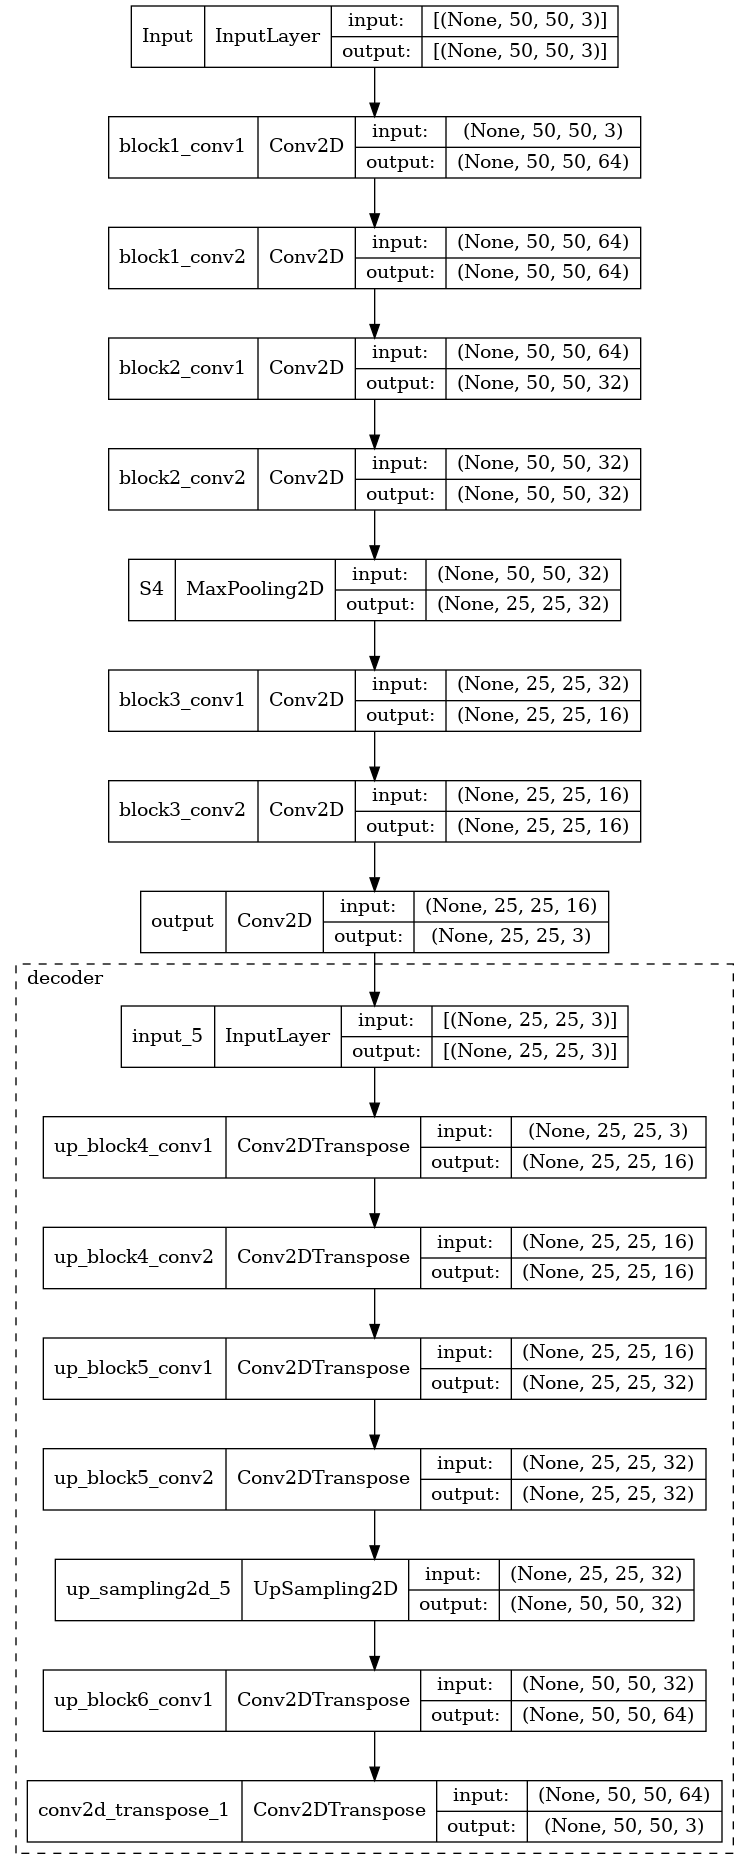

In [19]:
ae, ae_encoder, ae_decoder = AE(input_shape, encoder, decoder)
ae.summary()
plot_model(ae,show_shapes=True, show_layer_names=True,expand_nested=True)

In [20]:

#ae.add_loss(ae_loss( ae_input, ae_output))
#ae.add_metric('mse')
ae.compile(loss='mse', optimizer='adam')

In [21]:

ae.save('models/ae.h5')  
encoder.save('models/ae_encoder.h5')
decoder.save('models/ae_decoder.h5')    